In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Loading Dataset
data = pd.read_csv('USArrests.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Data Preprocessing 

In [5]:
data = data.rename({'Unnamed: 0':'State'}, axis = 1)
data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             50 non-null     object 
 1   Murder            50 non-null     float64
 2   Assault           50 non-null     int64  
 3   UrbanPop          50 non-null     int64  
 4   Rape              50 non-null     float64
 5   clusterid_Kmeans  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [6]:
data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>],
       [<AxesSubplot:title={'center':'clusterid_Kmeans'}>,
        <AxesSubplot:>]], dtype=object)

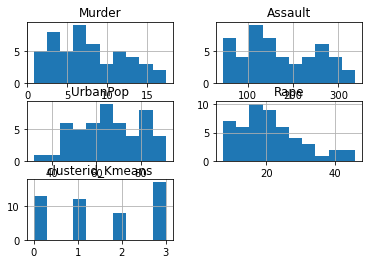

In [30]:
data.hist()

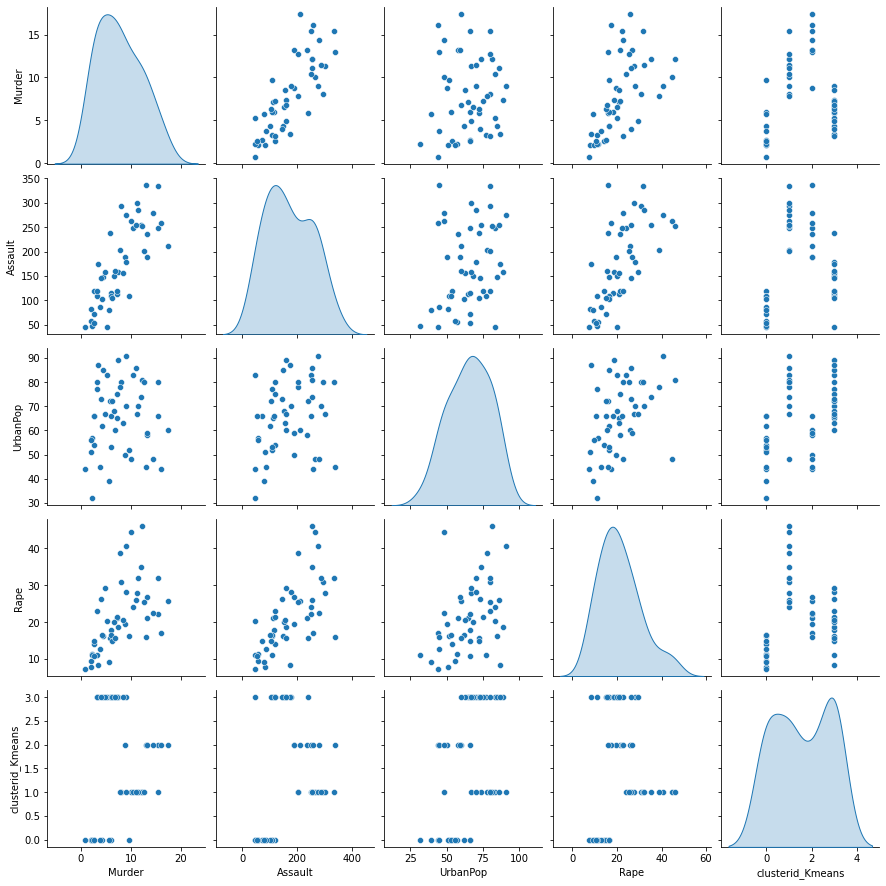

In [33]:
sns.pairplot(data,diag_kind="kde")

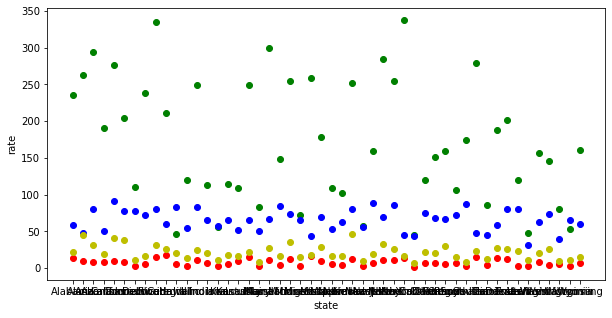

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(data.State, data.Murder, color='r')
plt.scatter(data.State, data.Assault, color='g')
plt.scatter(data.State, data.UrbanPop, color='b')
plt.scatter(data.State, data.Rape, color='y')
plt.xlabel('state')
plt.ylabel('rate')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing Dataset

scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(data.iloc[:,1:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

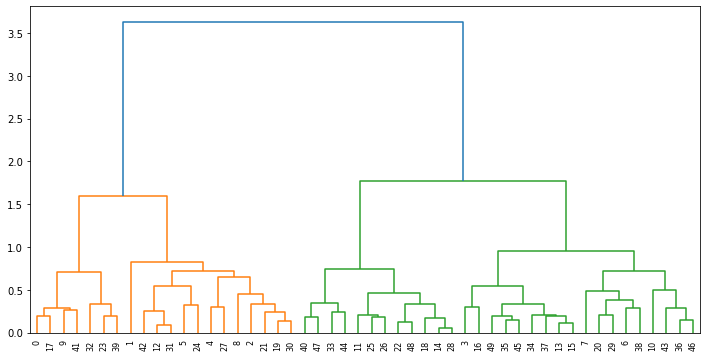

In [39]:
#certe a dendrogream
#Plotting the dendrogram - ward method
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(scaler_df,method='ward'))

# K-MEANS Clustering

In [10]:
x = data.iloc[:,[1,2,3,4]].values
x

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


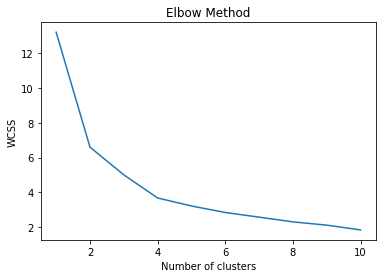

In [48]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#From above Scree plot, optimum number of clusters can be selected equal to 4

In [12]:
#Build Cluster algorithm

KM_clusters = KMeans(4, random_state=42)
KM_clusters.fit(scaler_df)

KMeans(n_clusters=4, random_state=42)

In [13]:
y=pd.DataFrame(KM_clusters.fit_predict(scaler_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

3    17
0    13
1    12
2     8
Name: clusterid_Kmeans, dtype: int64

In [14]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = KM_clusters.labels_
data

,State,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [15]:
data.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.966667,264.000000,76.500000,33.608333
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.852941,141.176471,73.647059,19.335294


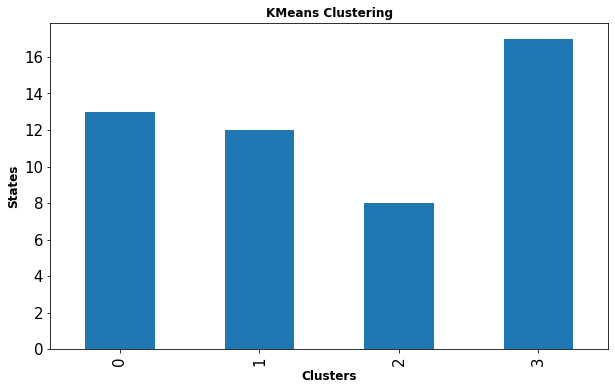

In [16]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [17]:
# States in cluster #0 
data[data['clusterid_Kmeans']==0]

,State,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0


In [18]:
# States in cluster #1 
data[data['clusterid_Kmeans']==1]

,State,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [19]:
# States in cluster #2 
data[data['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [20]:
# States in cluster #1 
data[data['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


# Hierarchial Clustering

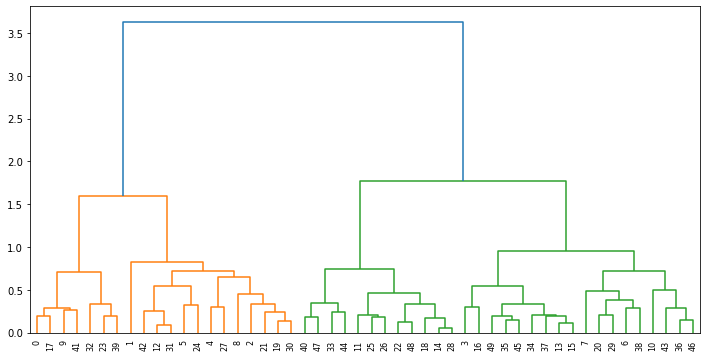

In [40]:
#certe a dendrogream
#Plotting the dendrogram - ward method
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(scaler_df,method='ward'))

In [49]:
#Fit and Predict
#specifying hierarchical clustering, clusters as 3(we are concidering n of cluster =3)
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=4)

In [50]:
#prediction - there is no centroid in agglomerative options
y_hc = hc.fit_predict(scaler_df)
y_hc

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [51]:
#3 clusters are formed.
#creating new dataframe column as clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
data['Hierarchical_clusterid'] = Clusters

In [52]:
data

,State,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans,Hierarchical_clusterid
0,Alabama,13.2,236,58,21.2,2,3
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,3,0
7,Delaware,5.9,238,72,15.8,3,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,2,3


In [53]:
data.groupby('Hierarchical_clusterid').agg(['mean']).reset_index()

,Hierarchical_clusterid,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
,,mean,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333,2.777778
1,1,10.815385,257.384615,76.000000,33.192308,1.153846
2,2,3.091667,76.000000,52.083333,11.833333,0.000000
3,3,14.671429,251.285714,54.285714,21.685714,2.000000


In [54]:
data['Hierarchical_clusterid'].value_counts()

0    18
1    13
2    12
3     7
Name: Hierarchical_clusterid, dtype: int64

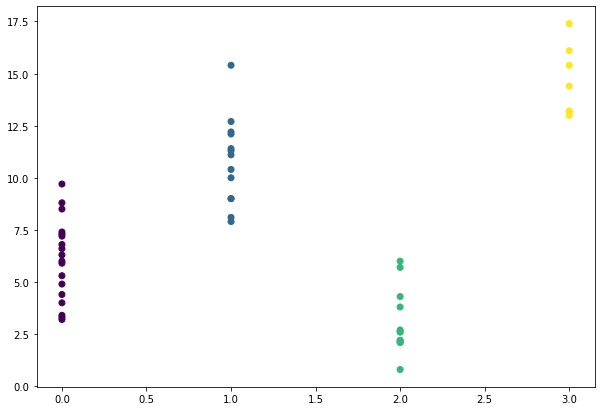

In [55]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['Hierarchical_clusterid'],data['Murder'], c=hc.labels_) 

In [ ]:
# 4 clusters is form